# ASSIGNMENT 5 #

## DECISION TREE CLASSIFIER ##

Objective: <br>
Build a decision tree classifier to predict customer churn for a telecom company.

Tasks: <br>
Load and preprocess the telecom dataset. <br>
Train a decision tree model using scikit-learn. <br>
Visualize the tree and discuss feature importance.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
df_telco = pd.read_csv("C:/Users/hp/Downloads/Telco_Customer_Churn.csv", header = 0)

In [3]:
print(f"Dimensions of the Dataset: {df_telco.shape}")

Dimensions of the Dataset: (7043, 21)


In [4]:
df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df_telco.info()  #there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df_telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')

In [10]:
df_telco['TotalCharges'].isnull().sum()

np.int64(0)

In [9]:
df_telco['TotalCharges'] = df_telco['TotalCharges'].fillna(df_telco['TotalCharges'].mean())

In [11]:
df_telco['Contract'].nunique()

3

In [12]:
df_telco['PaymentMethod'].nunique()

4

Text(0, 0.5, 'Count')

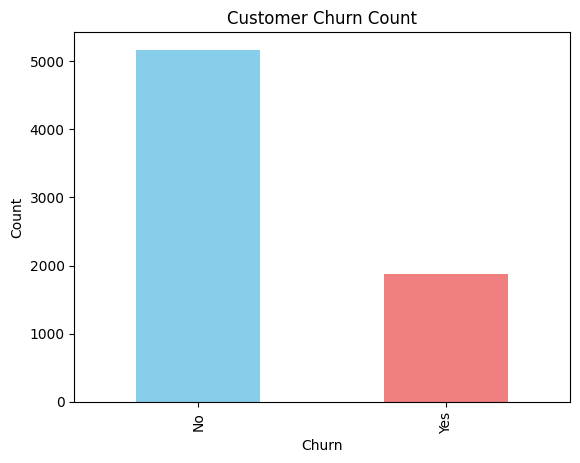

In [13]:
df_telco['Churn'].value_counts().plot(kind = 'bar', color=['skyblue', 'lightcoral'])
plt.title('Customer Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')

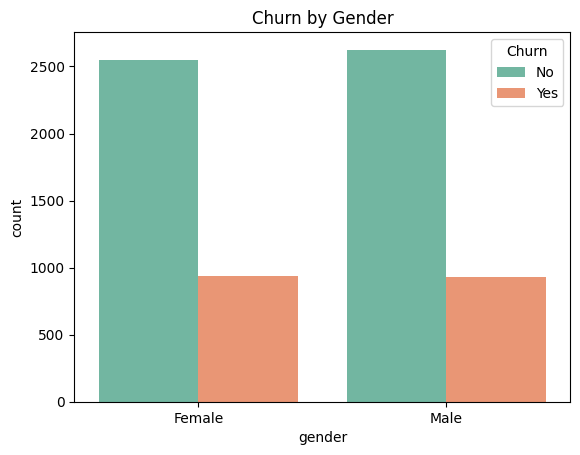

In [14]:
#to study the relationship between GENDER and CHURN
sns.countplot(x='gender', hue='Churn', data=df_telco, palette='Set2')
plt.title('Churn by Gender')
plt.show()
#no such pattern

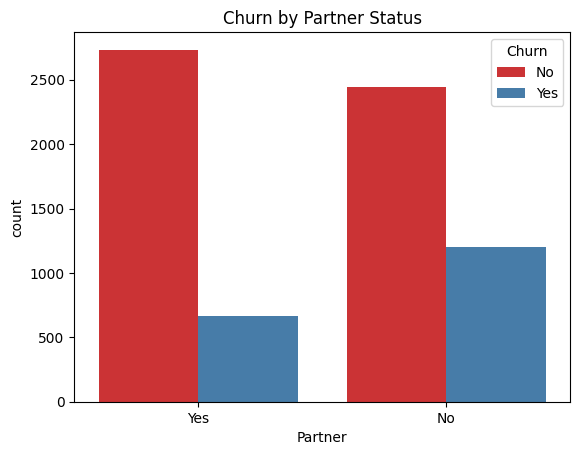

In [15]:
#PARTNER AND CHURN
sns.countplot(x='Partner', hue='Churn', data=df_telco, palette='Set1')
plt.title('Churn by Partner Status')
plt.show()
#single people churn more

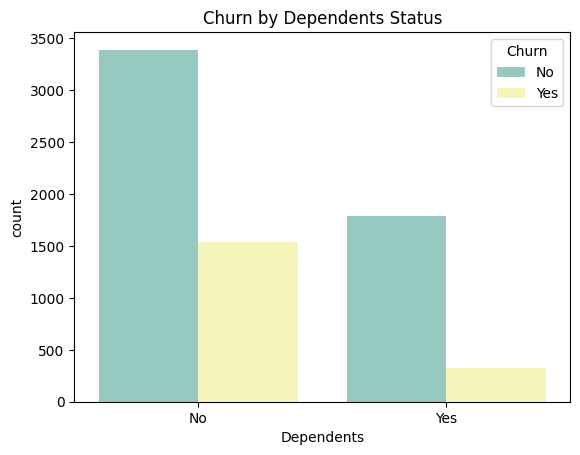

In [16]:
#DEPENDENTS VS CHURN
sns.countplot(x='Dependents', hue='Churn', data=df_telco, palette='Set3')
plt.title('Churn by Dependents Status')
plt.show()
#people with no dependents are more likely to churn

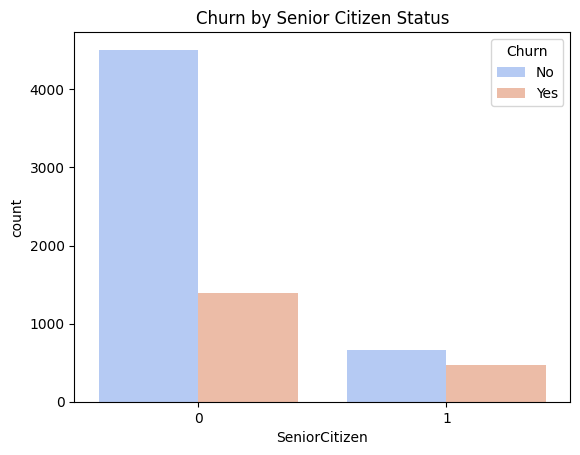

In [17]:
#SENIOR CITIZEN VS CHURN
sns.countplot(x='SeniorCitizen', hue='Churn', data=df_telco, palette='coolwarm')
plt.title('Churn by Senior Citizen Status')
plt.show()
#senior citizens are more likely to churn

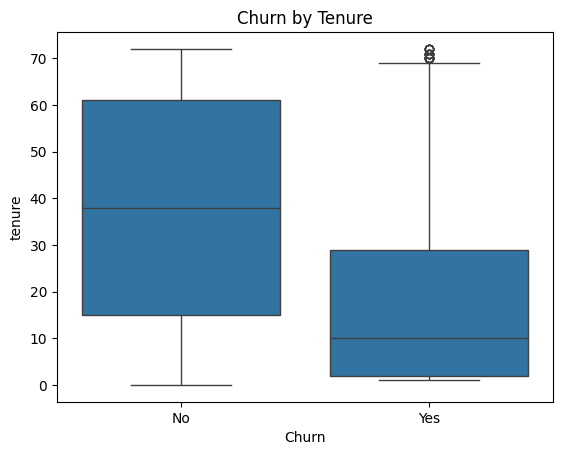

In [18]:
#TENURE AND CHURN
sns.boxplot(x='Churn', y='tenure', data=df_telco)
plt.title('Churn by Tenure')
plt.show()
#people with shorter tenure are more likely to churn. loyal customers do not churn, generally.

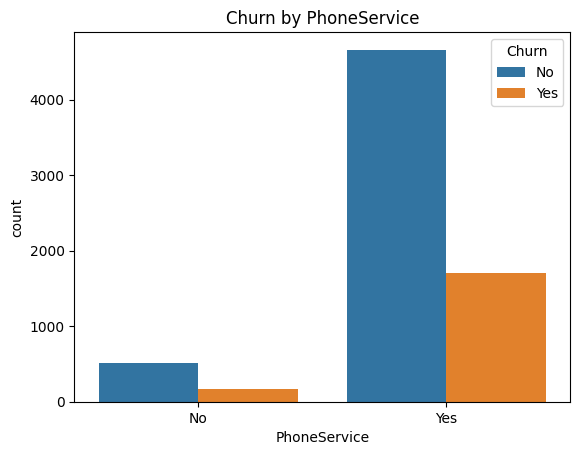

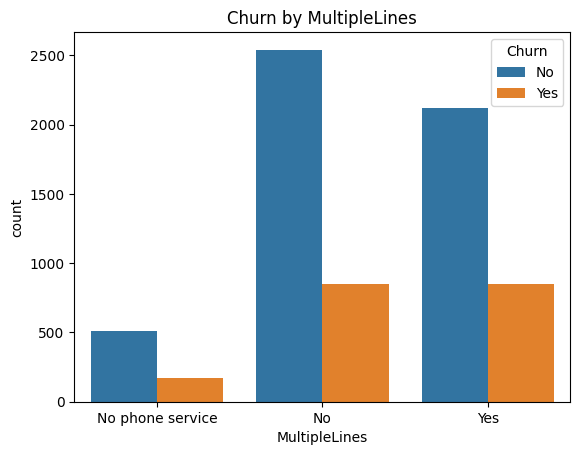

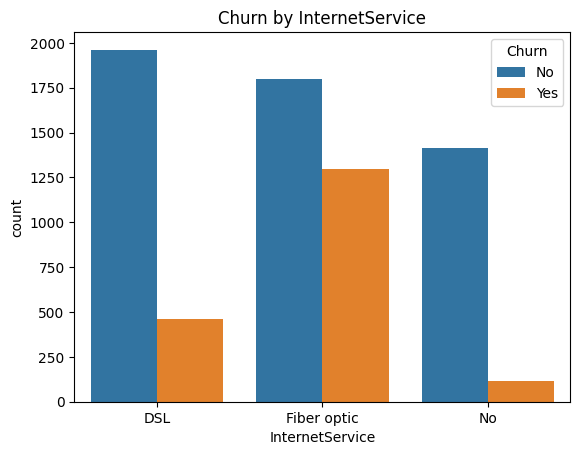

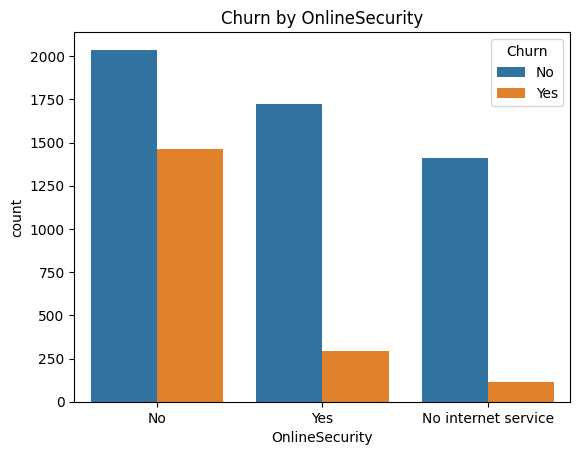

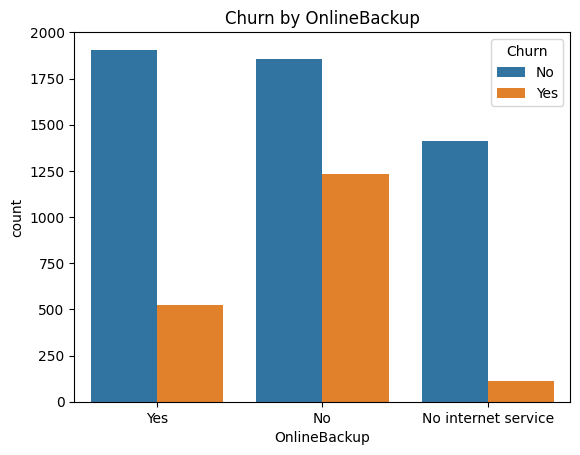

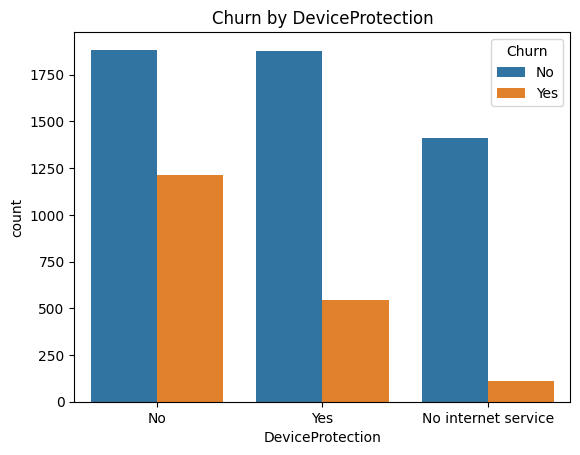

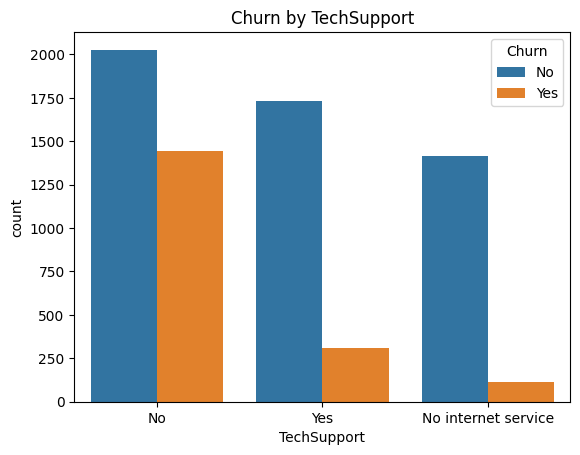

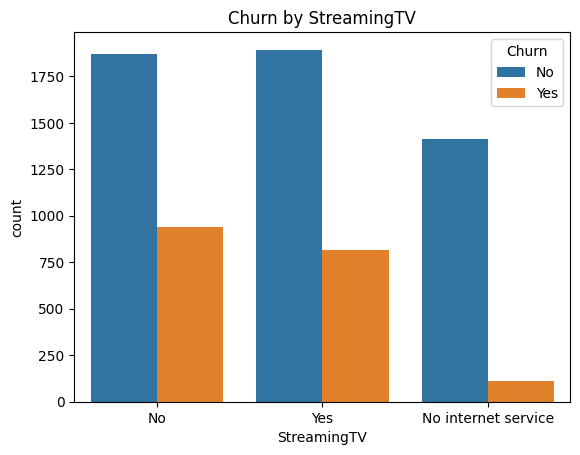

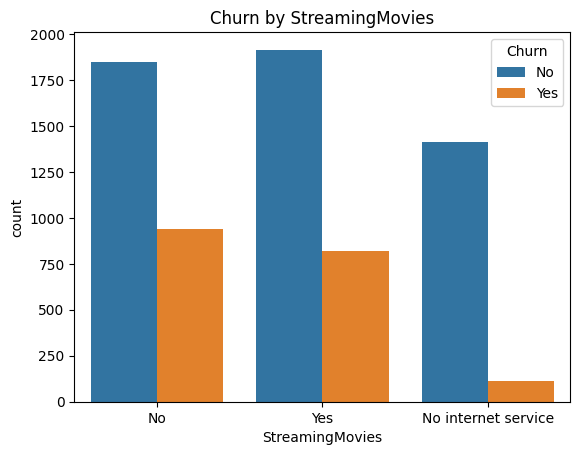

In [19]:
#services contributing to churn
service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for service in service_columns:
    sns.countplot(x=service, hue='Churn', data=df_telco)
    plt.title(f'Churn by {service}')
    plt.show()
#multiple phone lines client has more churn count
#fibre optic internet service people have the most churn count. 
#people who avail online security benefits do not contribute to churn significantly
#people with no internet backup contribute significantly to the churn count, the ones with backup have normal rate. Similar with no device protection clients and tech support clients. 
#around 1/3rd of customers which avail streamingTV services, churn. 

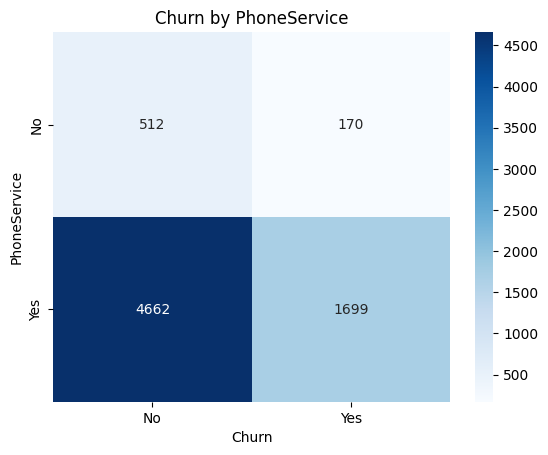

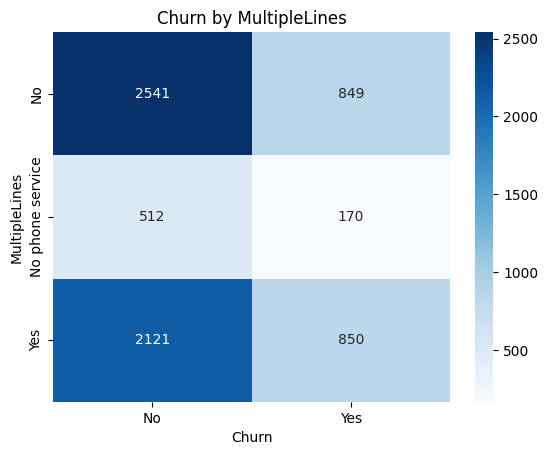

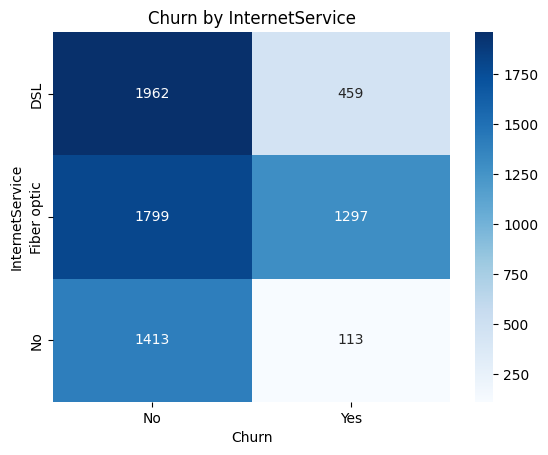

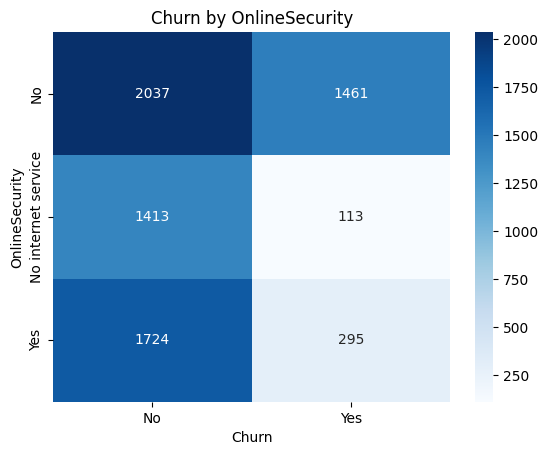

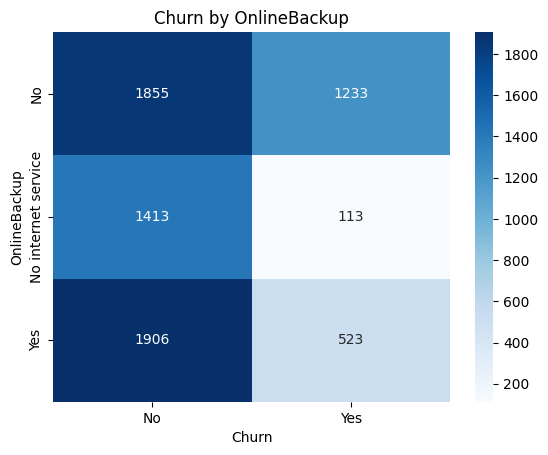

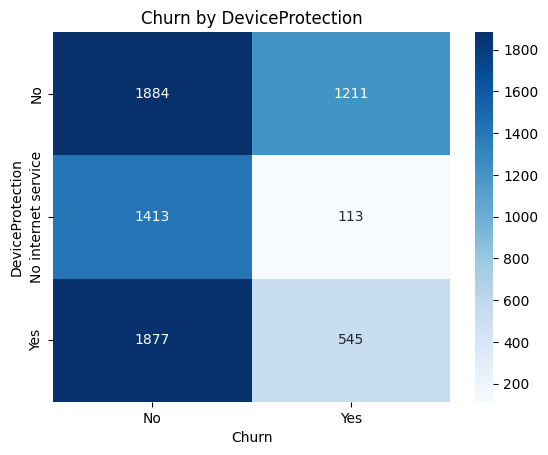

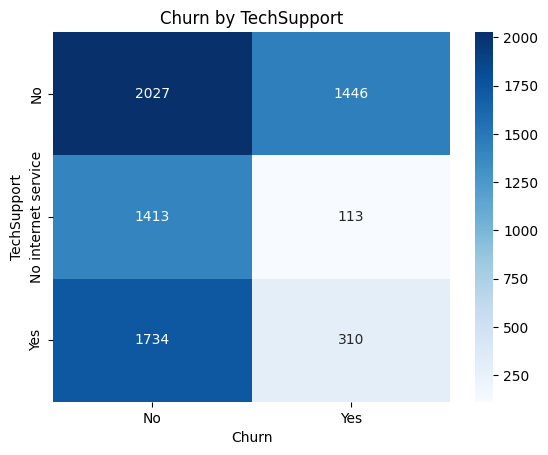

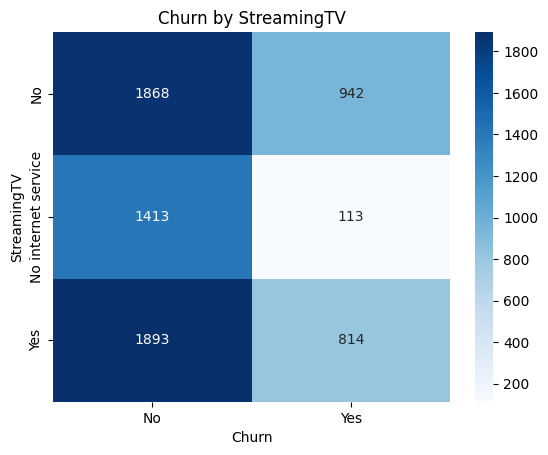

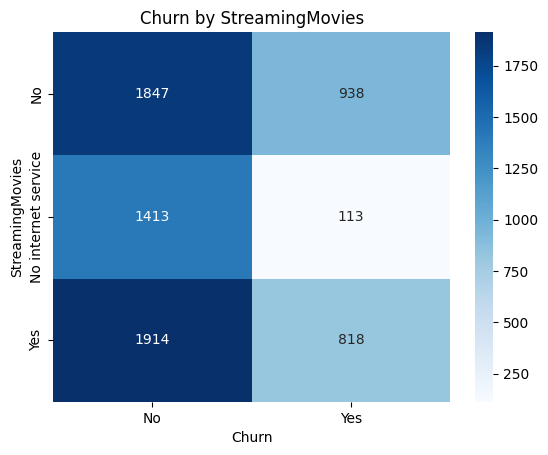

In [24]:
#services contirbuting to churn, heatmap. 
for service in service_columns:
    crosstab = pd.crosstab(df_telco[service], df_telco['Churn'])
    
    # Plot the heatmap
    sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Churn by {service}')
    plt.ylabel(service)
    plt.xlabel('Churn')
    plt.show()

In [20]:
df_telco['customerID'].head()

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customerID, dtype: object

In [21]:
#Using ONE HOT ECODER. for categorical features
df_telco.drop(columns = 'customerID', inplace = True)

In [22]:
#identify categorical variables
categorical = df_telco.nunique()[df_telco.nunique() < 5].keys().tolist()
categorical.remove('Churn')
print('Categorical columns:\n', categorical)

Categorical columns:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [25]:
# identify numerical column names
numerical = [x for x in df_telco.columns if x not in categorical]
#numerical.remove('Churn')
print('\nNumeric columns:\n', numerical)


Numeric columns:
 ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [26]:
#ONE HOT ENCODING
df_telco_encoded = pd.get_dummies(
    data = df_telco,
    columns = categorical,
    drop_first = True,
    dtype = int
)

In [27]:
df_telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df_telco_encoded.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,No,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,No,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,Yes,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [29]:
#removing redundant features
corr_cols = [
    'OnlineSecurity_No internet service', 
    'OnlineBackup_No internet service', 
    'DeviceProtection_No internet service', 
    'TechSupport_No internet service', 
    'StreamingTV_No internet service', 
    'StreamingMovies_No internet service', 
    'MultipleLines_No phone service'
]
df_telco_encoded.drop(columns=corr_cols, inplace=True)

In [30]:
# One-hot encode Churn, if not done yet
df_telco_encoded['Churn'] = df_telco_encoded['Churn'].str.strip()  # Strip any whitespace
df_encoded = pd.get_dummies(df_telco_encoded, columns=['Churn'], drop_first=True)  # Encode Churn

In [31]:
df_telco_encoded['Churn'] = df_telco_encoded['Churn'].map({'No': 0, 'Yes': 1})

In [33]:
df_telco_encoded.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
5,8,99.65,820.50,1,0,0,0,0,1,1,...,1,0,1,1,0,0,1,0,1,0
6,22,89.10,1949.40,0,1,0,0,1,1,1,...,0,0,1,0,0,0,1,1,0,0
7,10,29.75,301.90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,28,104.80,3046.05,1,0,0,1,0,1,1,...,1,1,1,1,0,0,1,0,1,0
9,62,56.15,3487.95,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
#create features and target

X = df_telco_encoded.drop(columns=['Churn'])
y = df_telco_encoded['Churn']

In [35]:
X.shape

(7043, 23)

In [36]:
y.shape

(7043,)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [38]:
X_train.shape

(4930, 23)

In [39]:
y_train.shape

(4930,)

In [40]:
X_test.shape

(2113, 23)

In [41]:
y_train.head()

1695    0
1095    0
3889    0
3667    0
2902    0
Name: Churn, dtype: int64

In [48]:
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [49]:
y_pred = clf.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', round(accuracy, 2))
print('Precision:', round(precision, 2))
print('Recall:', round(recall, 2))

Accuracy: 0.74
Precision: 0.52
Recall: 0.49


In [51]:
classif = classification_report(y_test, y_pred)
print(classif)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1539
           1       0.52      0.49      0.50       574

    accuracy                           0.74      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.74      0.73      2113



In [58]:
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[1275  264]
 [ 293  281]]


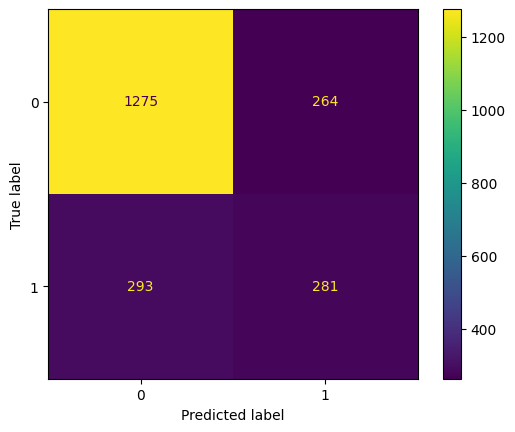

In [60]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## CLASS IMBALANCE- Synthetic Minority Over-sampling Technique(SMOTE)

In [61]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [63]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [67]:
print(y_train.value_counts())

Churn
0    3622
1    1308
Name: count, dtype: int64


In [68]:
print(y_train_smote.value_counts())

Churn
0    3622
1    3622
Name: count, dtype: int64


In [73]:
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [74]:
clf.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [75]:
y_pred_smote = clf.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1552
           1       0.48      0.56      0.52       561

    accuracy                           0.72      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.74      0.72      0.73      2113



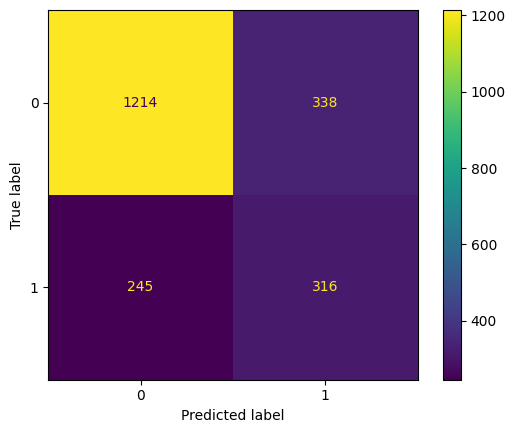

In [79]:
cms = confusion_matrix(y_test, y_pred_smote)
disp_s = ConfusionMatrixDisplay(cms)
disp_s.plot()